Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [90]:
NAME = "Luuk Teunissen", 2013281
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

and if you are doing this with someone else (not more than one other person):

COLLABORATORS = "Karl Marx, #student number#"

# exam June 7th, 2018



In the first cell of the notebook, give us your name and student number in the way indicated above. If you do this notebook with --at max.-- one other student, give her/his name and student number as well under "COLLABORATORS".

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam June 7, 2018".



## price effects of mergers

We consider a merger in this notebook. 

First we calculate the equilibrium with three firms, denoted by 1, 2 and 3. Then firms 2 and 3 merge so that we are left with 2 firms; denoted by 1 and 2.

We calculate the effects of the merger on the equilibrium price.

We start by importing the usual libraries.

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

The following code helps to calculate the equilibrium for the case with 3 firms. Note that you have seen similar code during the tutorials to calculate the equilibrium with 2 firms.

We assume that before the merger each firm has constant marginal costs equal to 0.3. We assume a simple linear (inverse) demand curve of the form $p=1-Q$ where $p$ denotes price and $Q$ total output on the market. Total output equals the sum of each firm's output: $Q= q_1 + q_2+q_3$.

In [92]:
c0 = 0.3
vector_c = [c0]*3

def p(Q):
    return 1 - Q

def costs(q,c):
    return c*q

def profits(q,Q_other,c):
    return p(q+Q_other)*q-costs(q,c)

def reaction(Q_other,c):
    q1 =  optimize.fminbound(lambda x: -profits(x,Q_other,c),0,1,full_output=1)
    return q1[0]

def fixed_point_three_firms(vector_q,vector_c):
    return [vector_q[0]-reaction(vector_q[1]+vector_q[2],vector_c[0]),
            vector_q[1]-reaction(vector_q[0]+vector_q[2],vector_c[1]),
            vector_q[2]-reaction(vector_q[0]+vector_q[1],vector_c[2])]



#### a) [0.5 points] Show that total equilibrium output equals  0.525. Derive the equilibrium price and Herfindahl index; denote these by `P0` and `H0` resp.

In [93]:
# YOUR CODE HERE
initial_guess = [0,0,0]

sum(optimize.fsolve(lambda q: fixed_point_three_firms(q, vector_c), initial_guess)) #calculates the total output at equilibrium#
#used the sum and optimize.fsolve commands to calculate the total output of the 3 firms at equilibrium.

0.525

In [94]:
P0 = p(0.525) #calculates the equilibrium price
print('P0 =', P0) #used the equilibrium value calculated above, and inserted it into the P formula to calculate the equilibrium price

P0 = 0.475


In [95]:
def Herfindahl_index(ms_1,ms_2,ms_3): #calculates the Herfindahl index at given production outputs of the firms
    return ms_1**2 + ms_2**2 + ms_3**2

ms_1 = 1/3 #calculates the marketshare of each firm
ms_2 = 1/3
ms_3 = 1/3

H0 = Herfindahl_index(ms_1,ms_2,ms_3)

print('H0 =', H0) #made a simple formula to calculate the Herfindahl index at the equilibrium. there are 3 firms, so they all have a market share of 1/3
#and simply take the market shares to the power of 2 and add them up to calculate the index.

H0 = 0.3333333333333333


#### b) [0.5 point] Define a function `fixed_point_two_firms` with the same structure as the function `fixed_point_three_firms` above, except that it derives the equilibrium output levels for a duopoly (two firms). Test this function by showing that each of the two firms produces 0.3333 in case both firms have zero costs.

In [102]:
# YOUR CODE HERE
def fixed_point_two_firms(q,c):
    return [q[0]-reaction(q[1],c[0]),q[1]-reaction(q[0],c[1])]

initial_guess = [0,0]

optimize.fsolve(lambda q: fixed_point_two_firms(q,[0,0]), initial_guess) #changed the given formula to suit the situation with only 2 firms

array([0.33333333, 0.33333333])

The Dutch competition authority, ACM, is asked to evaluate the effects of a merger between firms 2 and 3. Firms 2 and 3 claim that by merging they can reduce their constant marginal costs. But it is not clear by how much they will reduce their costs.

The ACM assumes that the marginal cost level of the merged firm is uniformly distributed between 0 and the current marginal cost level `c0`. The merger will not affect the marginal cost level of firm 1 who does not merge. Firm 1's cost level remains `c0`.

The next cell generates a vector of cost levels for the merged firm, denoted `c_after_merger`. Evaluate "c_after_merger" in a separate cell if you do not understand the command that defines it.

Then it calculates the equilibrium output levels for (the non-merging) firm 1 and (the merged) firm 2.

Note that you need to specify `initial_guess`.


In [103]:
c_after_merger = np.random.uniform(0,c0,size = 100)

q1_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[0] for c in c_after_merger]
q2_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[1] for c in c_after_merger]




#### c) [0.5 points] Create a dataframe called `df_after_merger` with three columns: `c_merged_firm`, `output_non_merging_firm`, `output_merged_firm` containing resp. the cost level of the merged firm, the output level of firm 1 and the output level of firm 2.

In [104]:
# YOUR CODE HERE
initial_guess=[0,0]
data = {'c_after_merger': c_after_merger, 'q1_after_merger': q1_after_merger, 'q2_after_merger': q2_after_merger}
df_after_merger = pd.DataFrame(data=data)

df_after_merger.head()

,c_after_merger,q1_after_merger,q2_after_merger
0,0.001717,0.133906,0.432189
1,0.021896,0.140632,0.418736
2,0.114415,0.171472,0.357057
3,0.144142,0.181381,0.337239
4,0.072555,0.157518,0.384964


#### d) [0.5 points] Add three columns to the dataframe with resp. total equilibrium output on the market, `Q`, equilibrium price, `P` and the Herfindahl index, `H`.

In [105]:
# YOUR CODE HERE
df_after_merger['Q'] = df_after_merger['q1_after_merger'] + df_after_merger['q2_after_merger']
df_after_merger['P'] = p(df_after_merger['Q'])
df_after_merger['H'] = ((df_after_merger['q1_after_merger']/df_after_merger['Q'])**2 
                        + (df_after_merger['q2_after_merger']/df_after_merger['Q'])**2)
df_after_merger.head()

,c_after_merger,q1_after_merger,q2_after_merger,Q,P,H
0,0.001717,0.133906,0.432189,0.566094,0.433906,0.638819
1,0.021896,0.140632,0.418736,0.559368,0.440632,0.623591
2,0.114415,0.171472,0.357057,0.528528,0.471472,0.561648
3,0.144142,0.181381,0.337239,0.518619,0.481381,0.545158
4,0.072555,0.157518,0.384964,0.542482,0.457518,0.587893


calculated Q by adding up q1 and q2 after merger
calculated P by using the formula P(Q) = 1- Q
calculated H by using the formula (q1/Q)^2+(q2/Q)^2
and then I simply added them to the dataframe I already created

#### e) [0.5 points] Make a histogram of the equilibrium price `P` after the merger. Also indicate in the histogram the equilibrium price before the merger `P0`. Label the horizontal axis with $P$.

[hint: you may want to use matplotlib's `hist`, `vlines` and `legend` to make this graph (e.g use google to find these functions); but feel free to use something else]

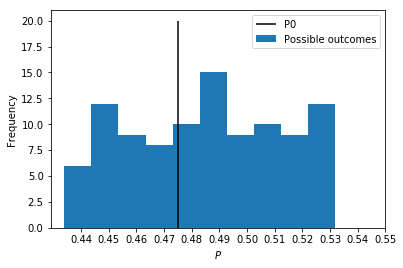

In [110]:
plt.hist(x=df_after_merger['P']),plt.vlines(P0,0,20),plt.legend(['P0','Possible outcomes'])
plt.xlabel('$P$')
plt.ylabel('Frequency')
plt.xticks(np.arange(.44, .55, .01))
plt.show()

Used google to learn about matplotlibs hist, vlines and legend. Then used these commands to generate the plot. used plt.hist to create the plot
Used plt.legend to create the legend, and used plt.vlines to create the p0 line at 0.475

#### f) [0.5 points] Explain why sometimes the equilibrium price after the merger exceeds the equilibrium price before the merger and sometimes it is lower than the pre-merger price. [hint: there is a trade off between two effects, depending on which effect dominates, equilibrium price increases or decreases after the merger]

The equilibrium price after the merger can exceed the equilibrium price before the merger, if through the merger the merged company gets a very large marketshare and can thus raise the equilibrium price by selling for a higher price then it was before the merger. On the other hand, the equilibrium price can also drop lower then it was before the merger because the merged company can produce more efficiently at lower costs and can thus lower their price forcing their competitors to cut costs and match their lower price thus lowering the equilibrium price.

#### g) [0.5 points] Make a graph with the Herfindahl index on the horizontal axis and the equilibrium price on the vertical axis. This is straightforward for $(H,P)$ after the merger as both values are in the dataframe. Add in another color, the pre-merger combination `(H0,P0)` that we calculated above.

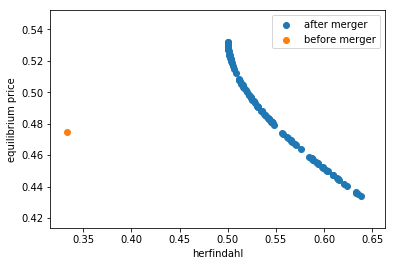

In [114]:
# YOUR CODE HERE
plt.scatter(df_after_merger['H'],df_after_merger['P'])
plt.scatter(H0,P0)
plt.xlabel('herfindahl')
plt.ylabel('equilibrium price')
plt.legend(['after merger','before merger'])

to plot the graph I used plt.scatter() and then used the already calculated values H and P and H0 and P0 and then used plt.legend to create a legend.

#### h) [0.5 points] Use the graph under g) to discuss the relation between the Herfindahl index and the equilibrium price. To illustrate, some people think that lower values of the Herfindahl index are associated with more competitive outcome. Would you agree with this?

if the costs are not lowered then it would be true and we'd see a higher price. But by merging firms a loss in competition can result in higher prices. And a higher value of H means less competition so I agree a lower value of H can be associated with a more competitive outcome.

## Github

After you have finished, we need to upload this notebook on github. Make sure that you upload the file on the github page of each collaborator.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.